In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

foph = pd.read_csv("T:/2021-10-22_10-03-52_BAGEPI-1086-cortes_study_data_cases.csv", sep = ';')

C:\Users\hgelb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
#rhc = pd.read_csv("C:\Users\hgelb\OneDrive\Documents\EPFL\labimmersion\data\rhc.csv")
rhc = pd.read_csv("../data/rhc.csv")

In [53]:
rhc.head()

,Unnamed: 0,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,death,cardiohx,...,meta,hema,seps,trauma,ortho,adld3p,urin1,race,income,ptid
0,1,COPD,NaN,Yes,11142,11151.0,NaN,11382,No,0,...,No,No,No,No,No,0.0,NaN,white,Under $11k,5
1,2,MOSF w/Sepsis,NaN,No,11799,11844.0,11844.0,11844,Yes,1,...,No,No,Yes,No,No,NaN,1437.0,white,Under $11k,7
2,3,MOSF w/Malignancy,MOSF w/Sepsis,Yes,12083,12143.0,NaN,12400,No,0,...,No,No,No,No,No,NaN,599.0,white,$25-$50k,9
3,4,ARF,NaN,No,11146,11183.0,11183.0,11182,Yes,0,...,No,No,No,No,No,NaN,NaN,white,$11-$25k,10
4,5,MOSF w/Sepsis,NaN,No,12035,12037.0,12037.0,12036,Yes,0,...,No,No,No,No,No,NaN,64.0,white,Under $11k,11


In [54]:
rhc.columns

Index(['Unnamed: 0', 'cat1', 'cat2', 'ca', 'sadmdte', 'dschdte', 'dthdte',
       'lstctdte', 'death', 'cardiohx', 'chfhx', 'dementhx', 'psychhx',
       'chrpulhx', 'renalhx', 'liverhx', 'gibledhx', 'malighx', 'immunhx',
       'transhx', 'amihx', 'age', 'sex', 'edu', 'surv2md1', 'das2d3pc',
       't3d30', 'dth30', 'aps1', 'scoma1', 'meanbp1', 'wblc1', 'hrt1', 'resp1',
       'temp1', 'pafi1', 'alb1', 'hema1', 'bili1', 'crea1', 'sod1', 'pot1',
       'paco21', 'ph1', 'swang1', 'wtkilo1', 'dnr1', 'ninsclas', 'resp',
       'card', 'neuro', 'gastr', 'renal', 'meta', 'hema', 'seps', 'trauma',
       'ortho', 'adld3p', 'urin1', 'race', 'income', 'ptid'],
      dtype='object')

<AxesSubplot:>

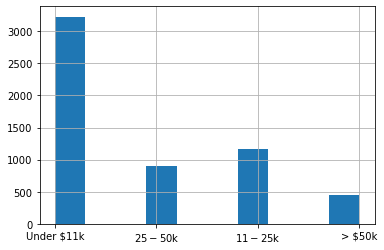

In [55]:
rhc.income.hist()
#rhc['income_grp'] = rhc.apply(lambda p: "very_low" if p.income == "Under $11k" else "low")# if p.income == "11−25k", else "high" if p.income == "25−50k", else "very high" axis = 1)
#rhc['income_grp'] = rhc.apply(lambda p: "very_low" if p.income == "Under $11k" else "low" if p.income == "11−25k", else "high" if p.income == "25−50k", else "very high" axis = 1)


In [56]:
foph.head()

,fall_id_hashd,fall_dt,altersjahr,sex,ktn,gemeinde,gemeinde_cd,pt_d1_impf_dt,pt_d2_impf_dt,vacc_status,case_death,pttoddat,pt_hospdatin,datum_lm
0,3ede48f3-ff2d-4676-8a7c-517a320ff62e,2020-02-24,70.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,NaN,NaN,2020-02-24,2020-02-24
1,a5ab42b7-188d-437c-a7a8-cc573fd36488,2020-02-25,25.0,Männlich,AG,Möriken-Wildegg,4203.0,NaN,NaN,unknown,NaN,NaN,2020-02-25,2020-02-26
2,7206a959-7ea9-4d41-9bd8-5e246339269e,2020-02-26,2.0,Männlich,GR,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2020-02-26,2020-02-26
3,183b5a64-34f2-4de5-9e49-3b29d604101f,2020-02-26,0.0,Männlich,GR,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2020-02-26,2020-02-26
4,e1900c37-23f5-4e9e-a817-7e30513ae17a,2020-02-26,28.0,Männlich,GE,Genève,6621.0,NaN,NaN,unknown,NaN,NaN,NaN,2020-02-26


NameError: name 'NA' is not defined

In [61]:
f = foph.iloc[:10, :]

In [62]:
f.head()

,fall_id_hashd,fall_dt,altersjahr,sex,ktn,gemeinde,gemeinde_cd,pt_d1_impf_dt,pt_d2_impf_dt,vacc_status,case_death,pttoddat,pt_hospdatin,datum_lm
0,3ede48f3-ff2d-4676-8a7c-517a320ff62e,2020-02-24,70.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,NaN,NaN,2020-02-24,2020-02-24
1,a5ab42b7-188d-437c-a7a8-cc573fd36488,2020-02-25,25.0,Männlich,AG,Möriken-Wildegg,4203.0,NaN,NaN,unknown,NaN,NaN,2020-02-25,2020-02-26
2,7206a959-7ea9-4d41-9bd8-5e246339269e,2020-02-26,2.0,Männlich,GR,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2020-02-26,2020-02-26
3,183b5a64-34f2-4de5-9e49-3b29d604101f,2020-02-26,0.0,Männlich,GR,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2020-02-26,2020-02-26
4,e1900c37-23f5-4e9e-a817-7e30513ae17a,2020-02-26,28.0,Männlich,GE,Genève,6621.0,NaN,NaN,unknown,NaN,NaN,NaN,2020-02-26


In [63]:
f['datum_lm'] = [e.datum_lm != 'NA' for _,e in f.iterrows()]

C:\Users\hgelb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
f.head()

,fall_id_hashd,fall_dt,altersjahr,sex,ktn,gemeinde,gemeinde_cd,pt_d1_impf_dt,pt_d2_impf_dt,vacc_status,case_death,pttoddat,pt_hospdatin,datum_lm
0,3ede48f3-ff2d-4676-8a7c-517a320ff62e,2020-02-24,70.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,NaN,NaN,2020-02-24,True
1,a5ab42b7-188d-437c-a7a8-cc573fd36488,2020-02-25,25.0,Männlich,AG,Möriken-Wildegg,4203.0,NaN,NaN,unknown,NaN,NaN,2020-02-25,True
2,7206a959-7ea9-4d41-9bd8-5e246339269e,2020-02-26,2.0,Männlich,GR,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2020-02-26,True
3,183b5a64-34f2-4de5-9e49-3b29d604101f,2020-02-26,0.0,Männlich,GR,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2020-02-26,True
4,e1900c37-23f5-4e9e-a817-7e30513ae17a,2020-02-26,28.0,Männlich,GE,Genève,6621.0,NaN,NaN,unknown,NaN,NaN,NaN,True


In [65]:
#data['fall_id_hashd'] = data['fall_id_hashd' > 0]
#foph['infection'] = []
foph['infection'] = [e.datum_lm != 'NA' for _,e in foph.iterrows()]

df = foph

In [70]:
df = foph
df['infection'] = foph['infection'].astype(int)

In [71]:
df.head()

,fall_id_hashd,fall_dt,altersjahr,sex,ktn,gemeinde,gemeinde_cd,pt_d1_impf_dt,pt_d2_impf_dt,vacc_status,case_death,pttoddat,pt_hospdatin,datum_lm,infection
0,3ede48f3-ff2d-4676-8a7c-517a320ff62e,2020-02-24,70.0,Männlich,TI,Lugano,5192.0,NaN,NaN,unknown,NaN,NaN,2020-02-24,2020-02-24,1
1,a5ab42b7-188d-437c-a7a8-cc573fd36488,2020-02-25,25.0,Männlich,AG,Möriken-Wildegg,4203.0,NaN,NaN,unknown,NaN,NaN,2020-02-25,2020-02-26,1
2,7206a959-7ea9-4d41-9bd8-5e246339269e,2020-02-26,2.0,Männlich,GR,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2020-02-26,2020-02-26,1
3,183b5a64-34f2-4de5-9e49-3b29d604101f,2020-02-26,0.0,Männlich,GR,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2020-02-26,2020-02-26,1
4,e1900c37-23f5-4e9e-a817-7e30513ae17a,2020-02-26,28.0,Männlich,GE,Genève,6621.0,NaN,NaN,unknown,NaN,NaN,NaN,2020-02-26,1


In [72]:
mod = smf.logit(formula='infection ~  vacc_status + sex + altersjahr + \
                        ktn', data=df)
res = mod.fit()
print(res.summary())

         Current function value: 0.000000
         Iterations: 35


LinAlgError: Singular matrix

R^2 is ???

In [37]:
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#confidence intervals
res.conf_int()

,0,1
Intercept,-3.142666,-1.786193
ssb_if,0.160700,0.514562
age,-0.045035,-0.022929
med_inc2009,0.000003,0.000013
nationality,-0.004721,0.527071
sex,-2.479561,-1.780724


In [38]:
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))


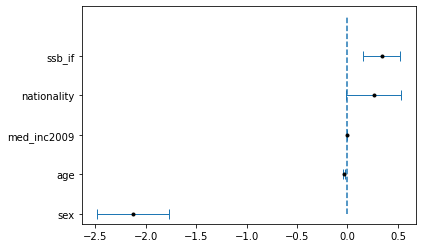

In [39]:
#fancy plotting

plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')

plt.yticks(range(len(l2)),l2);